<a href="https://colab.research.google.com/github/awiksshiith-narang/Handwritten_digit_recognizer/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required modules:**

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import logging
logging.getLogger( "tensorflow" ).setLevel( logging.ERROR )
import math as m
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

**Checking the version of TensorFlow:**

In [2]:
print( tf.__version__ )

2.12.0


**Loading the required datasets:**

In [3]:
dataset, metadata = tfds.load( 'mnist', as_supervised = True, with_info = True )

**Splitting the data:**

In [4]:
train_dataset, test_dataset = dataset[ 'train' ], dataset[ 'test' ]

**Exploring the data:**

In [5]:
num_train_examples = metadata.splits[ 'train' ].num_examples
num_test_examples = metadata.splits[ 'test' ].num_examples
print( "No, of train examples: {}".format( num_train_examples ) )
print( "No, of test examples: {}".format( num_test_examples ) )

No, of train examples: 60000
No, of test examples: 10000


**Preprocessing the data:**

In [6]:
def normalize( images, labels ):
  images = tf.cast( images, tf.float32 )
  images /= 255
  return images, labels

train_dataset = train_dataset.map( normalize )
test_dataset = test_dataset.map( normalize )

**Plotting the first few images:**

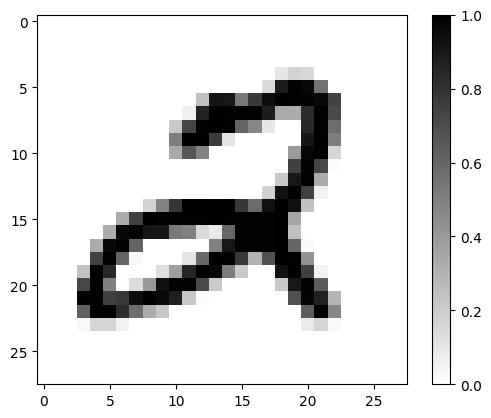

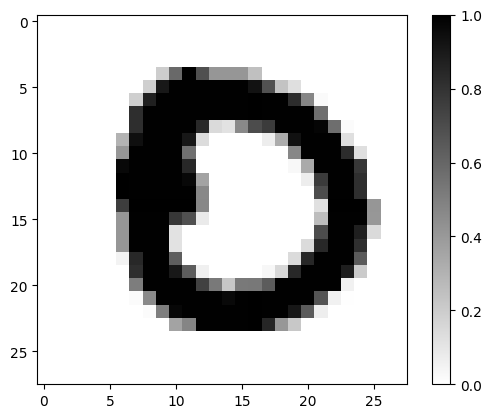

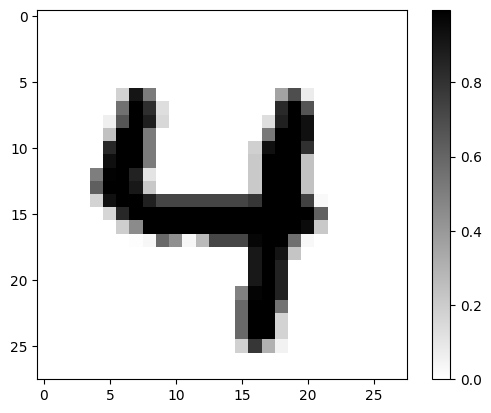

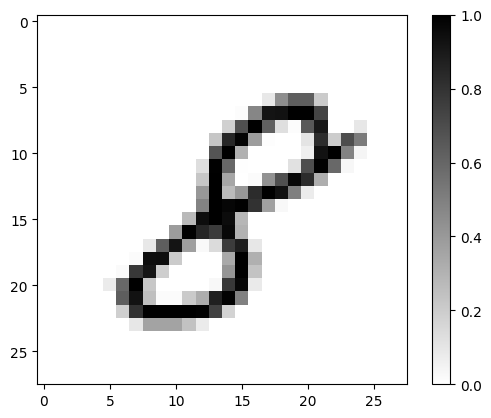

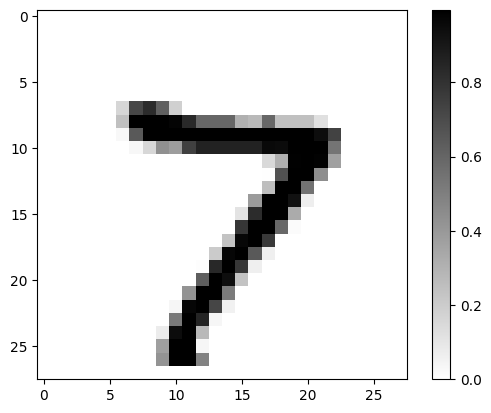

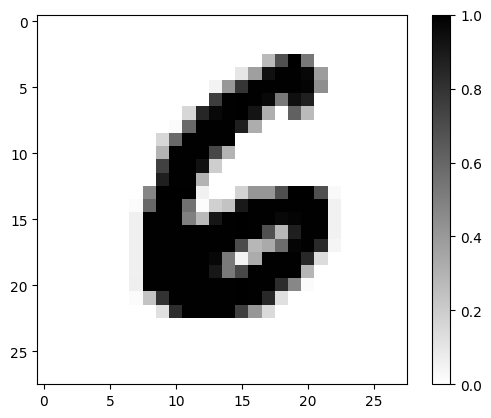

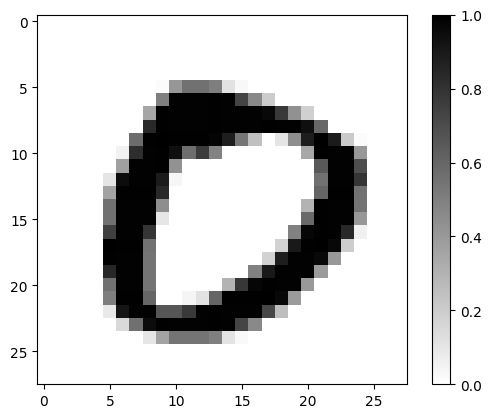

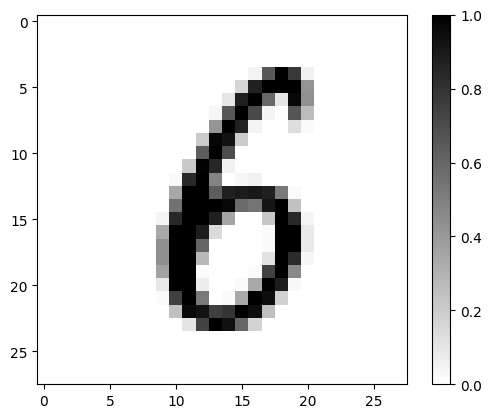

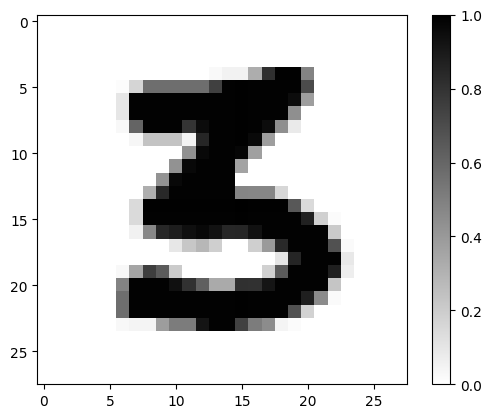

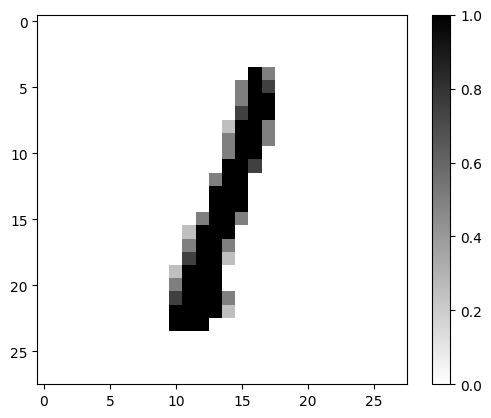

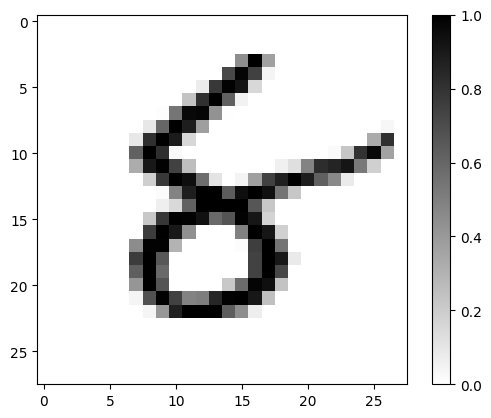

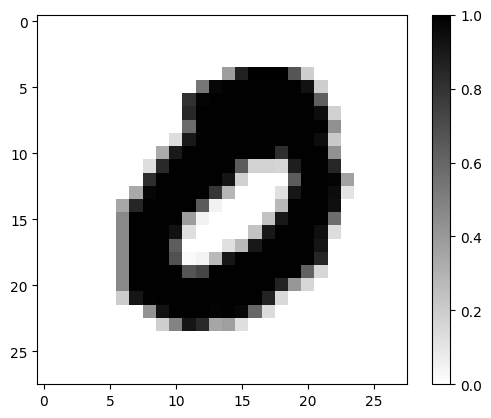

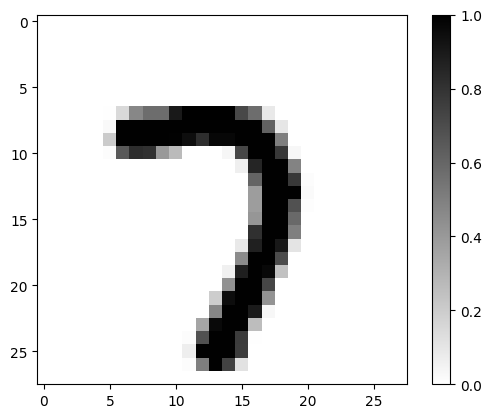

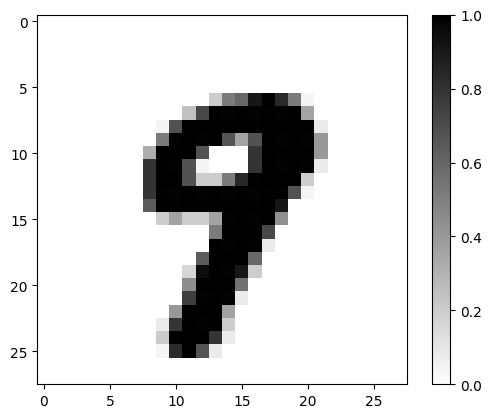

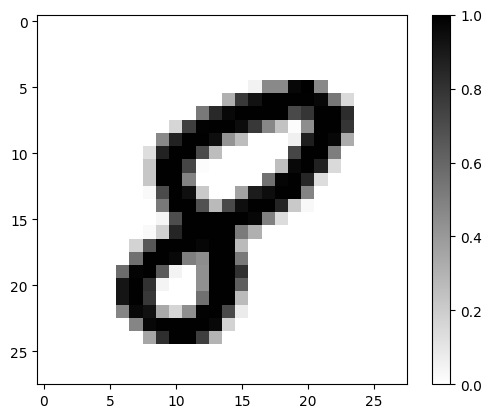

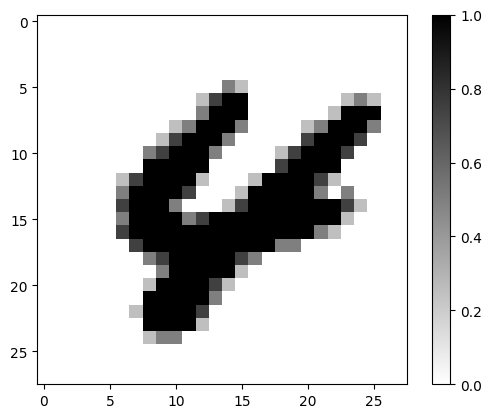

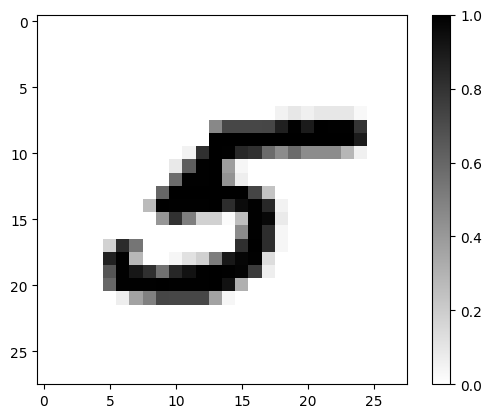

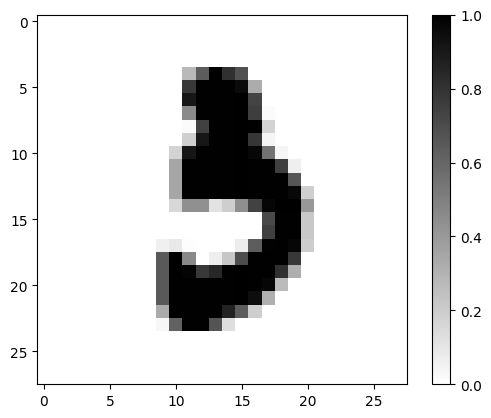

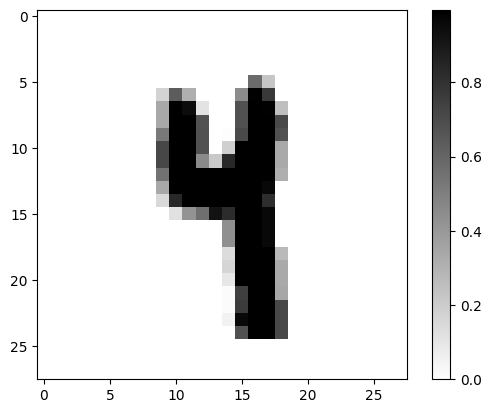

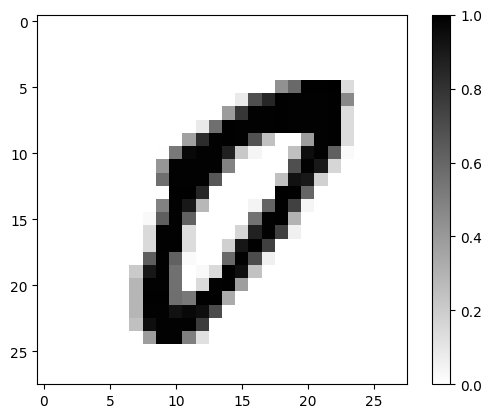

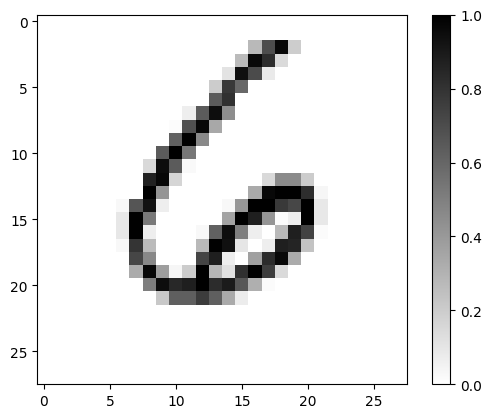

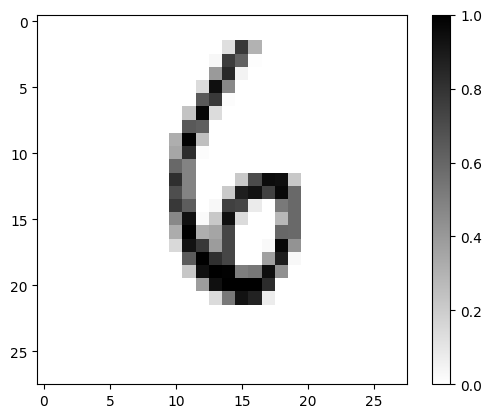

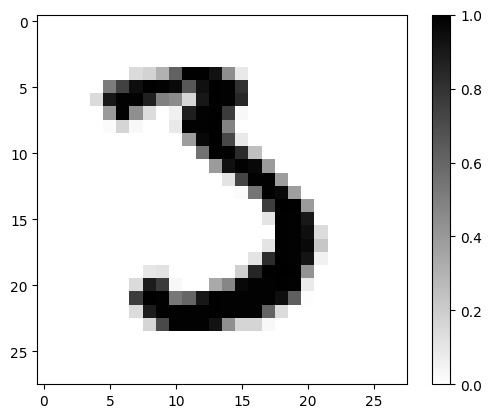

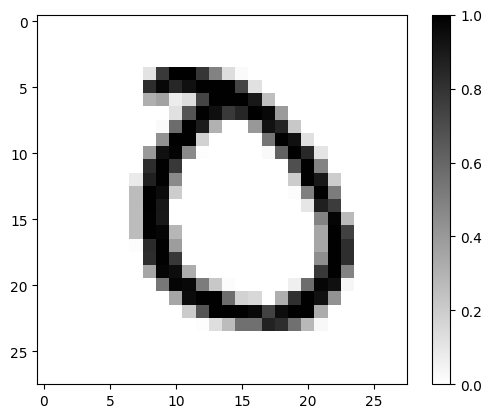

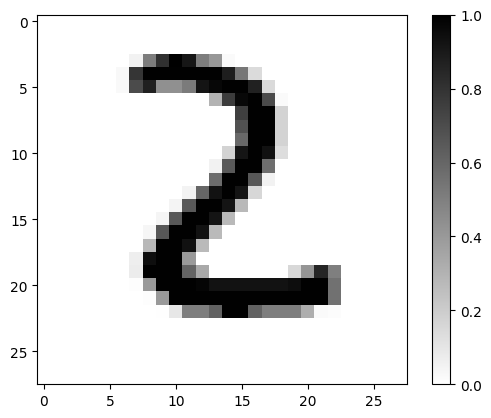

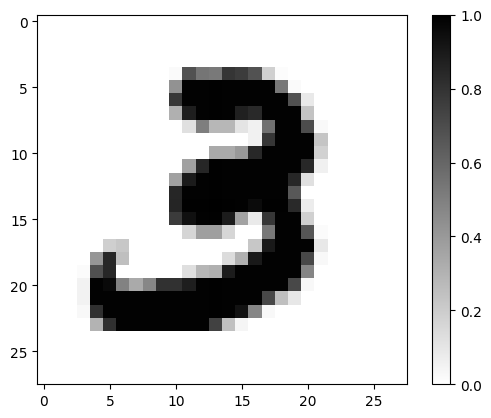

In [7]:
for image, label in test_dataset.take( 26 ):
  image = image.numpy().reshape( ( 28, 28 ) )
  plt.figure()
  plt.grid( False )
  plt.imshow( image, cmap = plt.cm.binary )
  plt.colorbar()
  plt.show()

**Building the model:**

In [8]:
model = tf.keras.Sequential( [ tf.keras.layers.Conv2D( 32, ( 3, 3 ), padding = 'same', activation = tf.nn.relu, input_shape = ( 28, 28, 1 ) ), tf.keras.layers.MaxPooling2D( ( 2, 2 ), strides = 2 ), tf.keras.layers.Conv2D( 64, ( 3, 3 ), padding = 'same', activation = tf.nn.relu ), tf.keras.layers.MaxPooling2D( ( 2, 2 ), strides = 2 ), tf.keras.layers.Flatten(), tf.keras.layers.Dense( 128, activation = tf.nn.relu ), tf.keras.layers.Dense( 10, activation = tf.nn.softmax ) ] )

**Compiling the model**

In [9]:
model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = [ 'accuracy' ] )

**Setting iteration parameters:**

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().batch( BATCH_SIZE )
test_dataset = test_dataset.batch( BATCH_SIZE )

**Training the model:**

In [11]:
model.fit( train_dataset, epochs = 10, steps_per_epoch = m.ceil( num_train_examples / BATCH_SIZE ) )

Epoch 1/10
1875/1875 [==============================] - 24s 6ms/step - loss: 0.1214 - accuracy: 0.9627
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0411 - accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9915
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0137 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

**Testing the model:**

In [12]:
test_loss, test_accuracy = model.evaluate( test_dataset, steps = m.ceil( num_test_examples / BATCH_SIZE ) )
print( "Accuracy on test dataset: {}".format( test_accuracy * 100 ) )

313/313 [==============================] - 2s 5ms/step - loss: 0.0426 - accuracy: 0.9904
Accuracy on test dataset: 99.04000163078308


**Predictions:**

In [13]:
for test_images, test_labels in test_dataset.take( 1 ):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict( test_images )

1/1 [==============================] - 0s 99ms/step


In [14]:
print( predictions.shape )

(32, 10)


In [15]:
print( predictions[ 0 ] )

[2.1055208e-25 1.3833955e-19 1.0000000e+00 2.0568750e-22 1.2972687e-16
 1.7930873e-22 2.2116078e-31 2.3377941e-17 6.1005775e-16 1.1925900e-17]


In [16]:
print( np.argmax( predictions[ 0 ] ) )

2


In [17]:
print( test_labels[ 0 ] )

2


**Plotting few images, their predicted values, probability of prediction and their actual values:**

In [22]:
def plot_images( i, predictions_array, true_labels, images ):
  predictions_array, true_label, img = predictions_array[ i ], true_labels[ i ], images[ i ]
  plt.grid( False )
  plt.xticks( [] )
  plt.yticks( [] )
  plt.imshow( img[ ..., 0 ], cmap = plt.cm.binary )
  predicted_label = np.argmax( predictions_array )
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel( "{} {}% ({})".format( predicted_label, 100 * np.max( predictions_array ), true_label ), color = color )

def plot_value_array( i, predictions_array, true_labels ):
  predictions_array, true_label = predictions_array[ i ], true_labels[ i ]
  plt.grid( False )
  plt.xticks( [] )
  thisplot = plt.bar( range( 10 ), predictions_array, color = '#777777' )
  plt.ylim( [ 0, 1 ] )
  predicted_label = np.argmax( predictions_array )
  thisplot[ predicted_label ].set_color( 'red' )
  thisplot[ true_label ].set_color( 'green' )

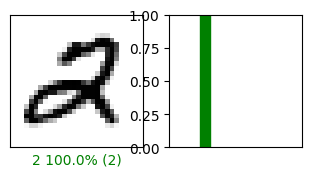

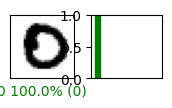

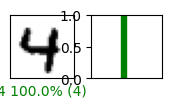

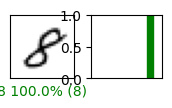

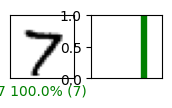

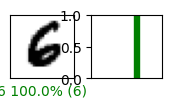

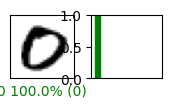

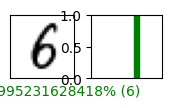

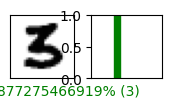

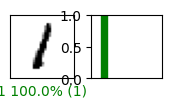

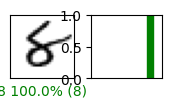

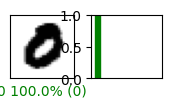

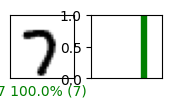

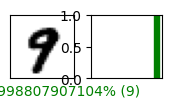

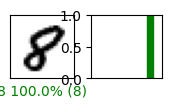

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure( figsize = ( 2 * 2 * num_cols, 2* num_rows ) )
for i in range( num_images ):
  plt.subplot( num_rows, 2* num_cols, 2 * i + 1 )
  plot_images( i, predictions, test_labels, test_images )
  plt.subplot( num_rows, 2* num_cols, 2 * i + 2 )
  plot_value_array( i, predictions, test_labels )
  plt.show()